In [1]:
import pandas as pd
import numpy as np

In [2]:
# with open('./SMS-spam classifier/spam.csv','r',encoding='utf-8',errors='ignore') as file:
#     df = file.read()

In [3]:
try:
    df = pd.read_csv('spam_data.csv', encoding='utf-8')
except UnicodeDecodeError:
    # If decoding error occurs, different encoding
    df = pd.read_csv('spam_data.csv', encoding='latin-1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4910,ham,Love that holiday Monday feeling even if I hav...,NaN,NaN,NaN
3435,ham,If india win or level series means this is rec...,NaN,NaN,NaN
3741,ham,Hey i'm bored... So i'm thinking of u... So wa...,NaN,NaN,NaN
2406,ham,One of best dialogue in cute reltnship..!! \We...,Dont Come Near My Body..!! Bcoz My Hands May ...,NaN,NaN
4591,ham,Right it wasnt you who phoned it was someone w...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# Data Cleaning
# EDA
# Text Processing
# Model Building
# Evaluation and Improving
# Website -----> Deploy on Heroku

# DATA CLEANING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
246,ham,I asked you to call him now ok
2189,ham,Yup i shd haf ard 10 pages if i add figures......
2522,ham,Dunno lei... I might b eatin wif my frens... I...
1293,ham,Happy birthday... May all ur dreams come true...
2267,ham,Finish liao... U?


In [10]:
df.rename(columns={'v1':'class','v2':'message'},inplace=True)
df.sample(5)

,class,message
2537,ham,That's y we haf to combine n c how lor...
1208,ham,Also maaaan are you missing out
2746,ham,K da:)how many page you want?
1128,spam,Ur HMV Quiz cash-balance is currently å£500 - ...
1107,ham,From someone not to smoke when every time I've...


In [11]:
# Encoding class values as 0 and 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])

In [12]:
df.head()

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

class      0
message    0
dtype: int64

In [14]:
# checking for duplicate values
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

# EDA

In [16]:
df.head()

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['class'].value_counts()

class
0    4516
1     653
Name: count, dtype: int64

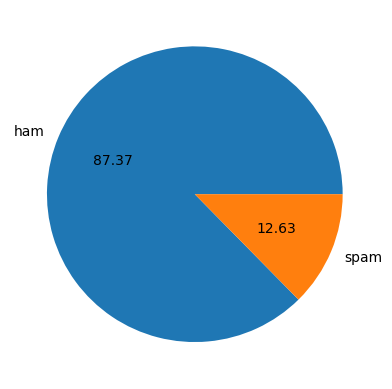

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['class'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()
# Data is imbalanced

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# For depth eda, we'll calculate no.of characters,words and sentences in a message
df['num_of_characters']=df['message'].apply(len)

In [21]:
df.head()

,class,message,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# num of words
df['num_of_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,class,message,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_of_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,class,message,num_of_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# for ham:
df[df['class']==0][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# for spam:
df[df['class']==1][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns

<Axes: xlabel='num_of_characters', ylabel='Count'>

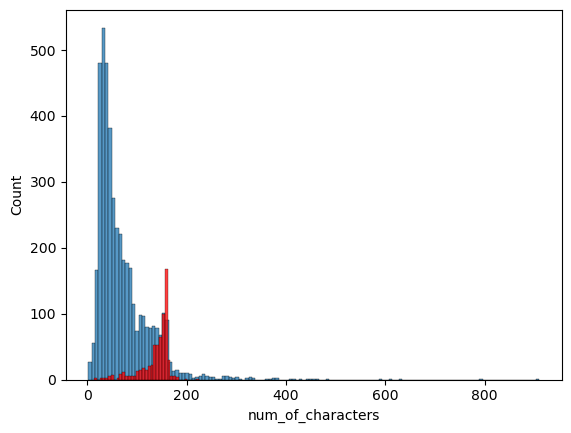

In [30]:
sns.histplot(df[df['class']==0]['num_of_characters'])
sns.histplot(df[df['class']==1]['num_of_characters'],color='red')

<Axes: xlabel='num_of_words', ylabel='Count'>

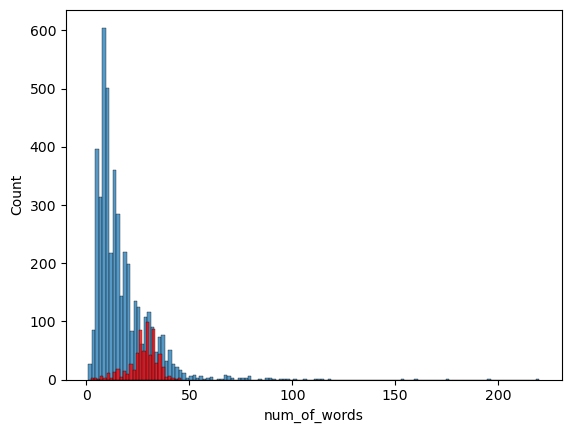

In [31]:
sns.histplot(df[df['class']==0]['num_of_words'])
sns.histplot(df[df['class']==1]['num_of_words'],color='red')

# Text Preprocessing

In [224]:
def transforming_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [47]:
transforming_text('Vishal is not gonna stop !!')

['vishal', 'gon', 'na', 'stop']

In [40]:
nltk.download('stopwords') # stopwords corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [42]:
from nltk.corpus import stopwords
stopwords.words('english')

In [44]:
# for puntuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

# checking every process below and modifying in above tranforming_text().

'danc'

In [51]:
transforming_text('I love dancing and singing..What about you?')

'love danc sing'

In [52]:
df['transformed_message']=df['message'].apply(transforming_text)

In [53]:
df.head()

,class,message,num_of_characters,num_of_words,num_of_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [59]:
# Word Cloud using world cloud module
# !pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='black')

In [60]:
spam_wc = wc.generate(df[df['class']==1]['transformed_message'].str.cat(sep=" "))

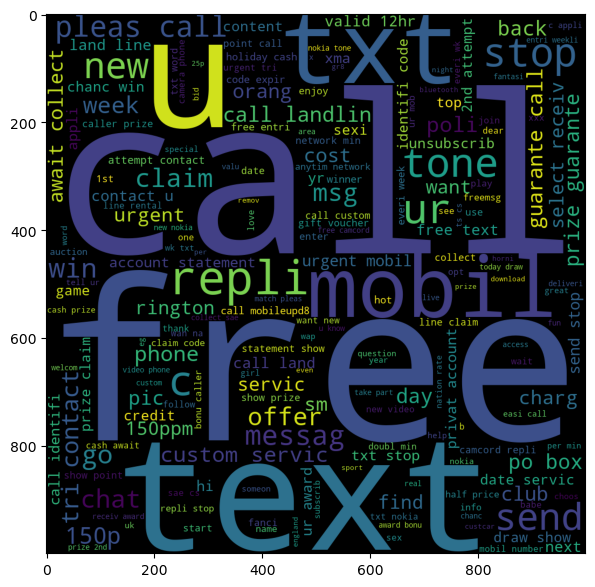

In [62]:
plt.figure(figsize=(12,7))
plt.imshow(spam_wc)

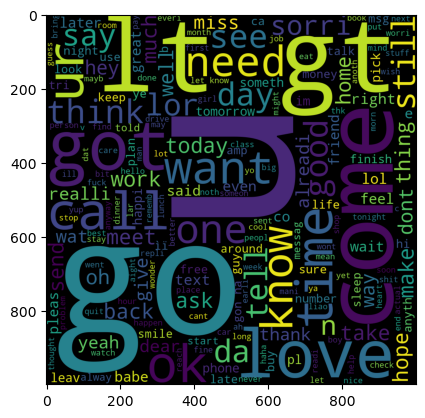

In [63]:
ham_wc = wc.generate(df[df['class']==0]['transformed_message'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [66]:
# for Most occuring 30 words
spam_corpus = []
for msg in df[df['class']==1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

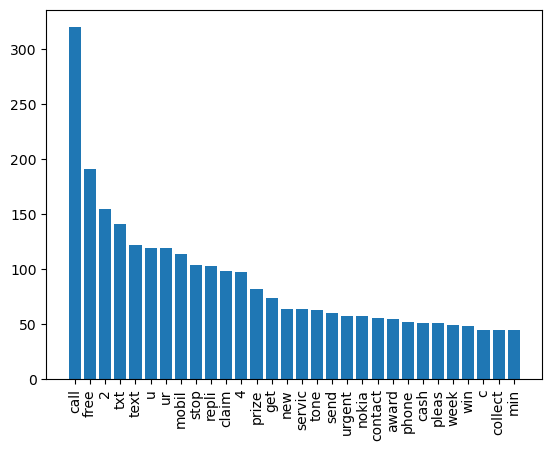

In [97]:
# for counting use collections lib.
from collections import Counter
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical');

In [98]:
ham_corpus = []
for msg in df[df['class']==0]['transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

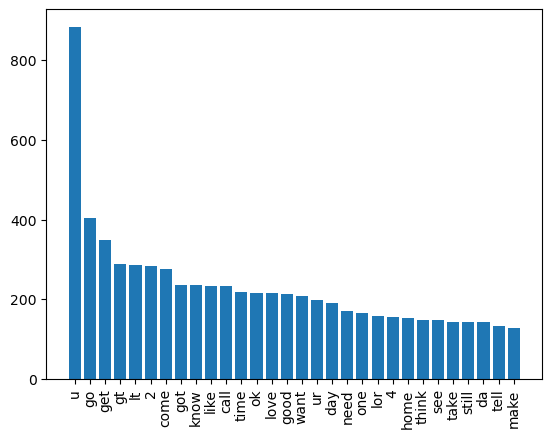

In [99]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical');

# Model Building

In [100]:
# Text Vectorization
# Bag of Words

In [235]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [236]:
X = tfidf.fit_transform(df['transformed_message']).toarray()

In [237]:
X.shape

(5169, 3000)

In [238]:
y = df['class'].values

In [239]:
from sklearn.model_selection import train_test_split

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [241]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [242]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [184]:
gnb.fit(X_train,y_train)
y1_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y1_pred))
print(precision_score(y_test,y1_pred))
print(confusion_matrix(y_test,y1_pred))

0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [243]:
mnb.fit(X_train,y_train)
y1_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y1_pred))
print(precision_score(y_test,y1_pred))
print(confusion_matrix(y_test,y1_pred))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [186]:
bnb.fit(X_train,y_train)
y1_pred = bnb.predict(X_test)
print(accuracy_score(y_test,y1_pred))
print(precision_score(y_test,y1_pred))
print(confusion_matrix(y_test,y1_pred))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [188]:
lrc = LogisticRegression(solver='liblinear',penalty='l1')
svc = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
knc = KNeighborsClassifier()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

In [189]:
classifier = {'LRC':lrc,
               'SVC':svc,
               'NB':mnb,
               'RF':rfc,
               'AdaBoost':abc,
               'Bgc':bc,
               'GBDT':gbc,
               'KN':  knc,
               'ETC':etc
              }

In [190]:
def train_clf(classifier,X_train,X_test,y_train,y_test):
    clf = classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    
    # return f'The precision is {precision} and accuracy is {accuracy}'.format(precision,accuracy)
    return accuracy,precision

In [191]:
train_clf(svc,X_train,X_test,y_train,y_test)

(0.9758220502901354, 0.9747899159663865)

In [192]:
acc_score = []
precise = []
for key,clf in classifier.items():
    accuracy,precision = train_clf(clf,X_train,X_test,y_train,y_test)
    print("For clf :" ,key)
    print("Accuracy : ",accuracy)
    print("Precision : ",precision)
    
    acc_score.append(accuracy)
    precise.append(precision)

For clf : LRC
Accuracy :  0.9584139264990329
Precision :  0.9702970297029703
For clf : SVC
Accuracy :  0.9758220502901354
Precision :  0.9747899159663865
For clf : NB
Accuracy :  0.9709864603481625
Precision :  1.0
For clf : RF
Accuracy :  0.9758220502901354
Precision :  0.9829059829059829
For clf : AdaBoost
Accuracy :  0.960348162475822
Precision :  0.9292035398230089
For clf : Bgc
Accuracy :  0.9584139264990329
Precision :  0.8682170542635659
For clf : GBDT
Accuracy :  0.9468085106382979
Precision :  0.9191919191919192
For clf : KN
Accuracy :  0.9052224371373307
Precision :  1.0
For clf : ETC
Accuracy :  0.9748549323017408
Precision :  0.9745762711864406


In [174]:
performance_df = pd.DataFrame({'Algo':classifier.keys(),'Accuracy':acc_score,'Precision':precise}).sort_values(['Accuracy','Precision'],ascending=False)

In [175]:
performance_df

,Algo,Accuracy,Precision
8,ETC,0.972921,0.982456
1,SVC,0.972921,0.974138
3,RF,0.971954,1.000000
4,AdaBoost,0.961315,0.945455
2,NB,0.959381,1.000000
5,Bgc,0.958414,0.862595
6,GBDT,0.952611,0.923810
0,LRC,0.951644,0.940000
7,KN,0.900387,1.000000


In [197]:
# model Improvement ----> max_features in Tfidf
# repeat above process for max_features=3000 (varying[guess])

new_df =  pd.DataFrame({'Algo':classifier.keys(),'Accuracy_feat_3000':acc_score,'Precision_feat_3000':precise}).sort_values(['Accuracy_feat_3000','Precision_feat_3000'],ascending=False)

In [198]:
performance_df.merge(new_df,on='Algo')

,Algo,Accuracy,Precision,Accuracy_feat_3000,Precision_feat_3000
0,ETC,0.972921,0.982456,0.974855,0.974576
1,SVC,0.972921,0.974138,0.975822,0.974790
2,RF,0.971954,1.000000,0.975822,0.982906
3,AdaBoost,0.961315,0.945455,0.960348,0.929204
4,NB,0.959381,1.000000,0.970986,1.000000
5,Bgc,0.958414,0.862595,0.958414,0.868217
6,GBDT,0.952611,0.923810,0.946809,0.919192
7,LRC,0.951644,0.940000,0.958414,0.970297
8,KN,0.900387,1.000000,0.905222,1.000000


In [199]:
# Can do scaling as well ----> I did but got poor results

In [207]:
# Voting Classifier ---> Multiple models at a time

from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid',gamma=0.1,probability=True)
rf = RandomForestClassifier(n_estimators=50,random_state=2)
nb = MultinomialNB()
voter = VotingClassifier(estimators=[('SVC',svc),('RF',rf),('NB',nb)],voting='soft')

In [208]:
voter.fit(X_train,y_train)

VotingClassifier(estimators=[('SVC',
                              SVC(gamma=0.1, kernel='sigmoid',
                                  probability=True)),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('NB', MultinomialNB())],
                 voting='soft')

In [211]:
pred = voter.predict(X_test)
print(accuracy_score(y_test,pred))
print(precision_score(y_test,pred))
# Not performing much well

0.9738878143133463
0.9743589743589743


In [212]:
# import joblib
# joblib.dump(tfidf,'Vectorizer.pkl',rb)
# joblib.dump(mnb,'classif_model.pkl')

['model.pkl']

In [244]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('final_model.pkl','wb'))